**Название проекта**

Определение стоимости автомобилей.

**Описание проекта**

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля. 
Нужно построить модель, которая научится определять. В нашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.

**Цель исследования**

Построить модель, которая научится определять стоимость автомобиля по данным о технических характеристиках и комплектации.

**Критерии исследования**

Критерии, которые важны заказчику:
* качество предсказания;
* время обучения модели;
* время предсказания модели.

**Исходные данные**

Данные находятся в файле /datasets/autos.csv.



Данные лежат в файле /datasets/taxi.csv. Скачать датасет. 

Количество заказов находится в столбце 'num_orders' (от англ. number of orders, «число заказов»).



<a href="#qwerty">План исследования находится в меню Table of contents</a>

<a id="qwerty"></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-неинформативных-столбцов" data-toc-modified-id="Удаление-неинформативных-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление неинформативных столбцов</a></span></li><li><span><a href="#Приведение-названий-столбцов-к-нижнему-регистру" data-toc-modified-id="Приведение-названий-столбцов-к-нижнему-регистру-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Приведение названий столбцов к нижнему регистру</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Анализ-аномальных-значений" data-toc-modified-id="Анализ-аномальных-значений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ аномальных значений</a></span></li></ul></li><li><span><a href="#Подготовка-выборок-данных" data-toc-modified-id="Подготовка-выборок-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка выборок данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><strong>CatBoostRegressor</strong></a></span></li><li><span><a href="#LightGBMRegressor" data-toc-modified-id="LightGBMRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><strong>LightGBMRegressor</strong></a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><strong>LinearRegression</strong></a></span></li><li><span><a href="#DummyRegressor" data-toc-modified-id="DummyRegressor-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span><strong>DummyRegressor</strong></a></span></li></ul></li><li><span><a href="#Анализ-времени-обучения-моделей,-времени-предсказания-моделей-и-качества-моделей" data-toc-modified-id="Анализ-времени-обучения-моделей,-времени-предсказания-моделей-и-качества-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ времени обучения моделей, времени предсказания моделей и качества моделей</a></span><ul class="toc-item"><li><span><a href="#Анализ-времени" data-toc-modified-id="Анализ-времени-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ времени</a></span></li><li><span><a href="#Анализ-качества" data-toc-modified-id="Анализ-качества-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ качества</a></span></li></ul></li><li><span><a href="#Лучшая-модель" data-toc-modified-id="Лучшая-модель-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Лучшая модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

### Загрузка данных

In [1]:
!pip install lightgbm -q
!pip install catboost -q
!pip install phik -q
!pip install optuna -q
!pip install optuna-integration -q
!pip install scikit-learn==1.3.0 -q

In [2]:
import warnings
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3

import optuna
from optuna.integration import OptunaSearchCV
from sklearn.model_selection import GridSearchCV
from optuna.distributions import IntDistribution, FloatDistribution, CategoricalDistribution

from time import time
import logging

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import lightgbm as lgb


from phik.report import correlation_report, plot_correlation_matrix

warnings.filterwarnings('ignore')

In [3]:
local_path = '/datasets/autos.csv'
url = 'https://code.s3.yandex.net/datasets/autos.csv'

if os.path.exists(local_path):
    df = pd.read_csv(local_path, parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'], dayfirst=True)
    print("Данные загружены из локального файла")
else:
    df = pd.read_csv(url, parse_dates=['date'])
    print("Данные загружены из интернета")

print(f"Размер данных: {df.shape}")
display(df.info())
df.head()

Данные загружены из локального файла
Размер данных: (354369, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null 

None

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


**Вывод по загрузке данных**

Данные успешно загружены. Типы данных корректны.



### Исследовательский анализ данных

<a href="#qwerty">К оглавнению</a>

На этапе исследовательского анализа данных:
1. Удалим неинформативные столбцы
2. Переименуем названия столбцов в единый стандарт sneak_case
3. Примем решение по заполнению пропусков
4. Проверим датафрейм на наличие дубликатов
5. Исследуем столбцы на аномальные значения

#### Удаление неинформативных столбцов

In [4]:
df.describe()

,DateCrawled,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,DateCreated,NumberOfPictures,PostalCode
count,354369,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369,354369.0,354369.000000
mean,2016-03-21 12:58:10.450648320,4416.656776,2004.234448,110.094337,128211.172535,5.714645,2016-03-20 19:12:07.753274112,0.0,50508.689087
min,2016-03-05 14:06:22,0.000000,1000.000000,0.000000,5000.000000,0.000000,2014-03-10 00:00:00,0.0,1067.000000
25%,2016-03-13 11:52:33,1050.000000,1999.000000,69.000000,125000.000000,3.000000,2016-03-13 00:00:00,0.0,30165.000000
50%,2016-03-21 17:50:55,2700.000000,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00,0.0,49413.000000
75%,2016-03-29 14:37:20,6400.000000,2008.000000,143.000000,150000.000000,9.000000,2016-03-29 00:00:00,0.0,71083.000000
max,2016-04-07 14:36:58,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00,0.0,99998.000000
std,NaN,4514.158514,90.227958,189.850405,37905.341530,3.726421,NaN,0.0,25783.096248


С логической точки зрения ясно, что столбцы **DateCrawled, DateCreated, LastSeen, PostalCode** не будут информативными.

Также, из анализа столбцов видно, что признак **NumberOfPictures** не будет информативен, так как все статистики у данного признака равны 0.

Также удалим столбец **RegistrationMonth**, так как **RegistrationYear** явно будет информативнее.

Удалим выделенные столбцы

In [5]:
del_df = df[['DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode', 'NumberOfPictures', 'RegistrationMonth']]
df = df.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode', 'NumberOfPictures', 'RegistrationMonth'], axis=1)
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


#### Приведение названий столбцов к нижнему регистру

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'kilometer', 'fueltype', 'brand', 'repaired'],
      dtype='object')

In [7]:
df = df.rename(columns={'registrationyear': 'registration_year', 'vehicletype': 'vehicle_type'})

#### Заполнение пропусков

Посмотрим на процент пропусков в каждом столбце

In [8]:
print('Процент пропусков в столбцах\n')
for column in df.columns:
    df[column] = df[column].fillna('nan') 
    percentage_unknown = (df[column] == 'nan').mean() * 100
    print(f"{column}: {percentage_unknown:.2f}%")

Процент пропусков в столбцах

price: 0.00%
vehicle_type: 10.58%
registration_year: 0.00%
gearbox: 5.60%
power: 0.00%
model: 5.56%
kilometer: 0.00%
fueltype: 9.28%
brand: 0.00%
repaired: 20.08%


Удалять пропуски не будем, так как это может привести к потере 20% данных.

Чтобы не искажать наши данные синтетическими, заменим пропуски на заглушки **nan** (было сделано в коде выше)




In [9]:
df.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fueltype             0
brand                0
repaired             0
dtype: int64

#### Обработка дубликатов

Приведем строковые значения в столбцах к нижнему регистру

In [10]:
def lower(df, list_col):
    for elem in list_col:
        df[elem] = df[elem].str.lower()

In [11]:
str_fich = ['vehicle_type', 'gearbox', 'model', 'fueltype', 'brand', 'repaired']
lower(df, str_fich)

In [12]:
for elem in str_fich:
    print(df[elem].value_counts())
    print('\n')

vehicle_type
sedan          91457
small          79831
wagon          65166
nan            37490
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: count, dtype: int64


gearbox
manual    268251
auto       66285
nan        19833
Name: count, dtype: int64


model
golf                  29232
other                 24421
3er                   19761
nan                   19705
polo                  13066
                      ...  
i3                        8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: count, Length: 251, dtype: int64


fueltype
petrol      216352
gasoline     98720
nan          32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: count, dtype: int64


brand
volkswagen        77013
opel              39931
bmw               36914
mercedes_benz     32046
audi              29456
ford         

Значение **other** в столбцах **vehicletype, model, fueltype** заменими на заглушку **nan**

In [13]:
for column in ['vehicle_type', 'model', 'fueltype']:
    df[column] = df[column].replace('nan', 'other')

Теперь более подробно исследуем уникальные значения столбца **model**

In [14]:
df['model'].unique()

array(['golf', 'other', 'grand', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox', 'ma

In [15]:
df['model'].replace('rangerover', 'range_rover', inplace=True)

In [16]:
df.duplicated().sum()

45191

In [17]:
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

Дубликаты обработаны

#### Анализ аномальных значений

In [19]:
# Функция для построения графиков количественного признака
def grafics(df_col, label_x2, label_y2, title):
    # Создание фигуры и осей
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=14, y=1.05)  # Общий заголовок
    # Гистограмма
    axs[0].hist(df_col,edgecolor='black', bins=30, alpha=0.7)
    axs[0].set_title('Гистограмма', fontsize=12)
    axs[0].set_xlabel(label_x2, fontsize=10)
    axs[0].set_ylabel(label_y2, fontsize=10)
    axs[0].grid(linestyle='--', alpha=0.5)
    # Диаграмма размаха
    sns.boxplot(
        x=df_col, 
        ax=axs[1], 
        color='lightgreen', 
        width=0.4,
        linewidth=1.5,
        flierprops=dict(
            marker='o', 
            markerfacecolor='red', 
            markersize=6,
            markeredgecolor='black'
        )
    )
    axs[1].set_title('Диаграмма размаха (Boxplot)', fontsize=12)
    axs[1].set_xlabel(label_x2, fontsize=10)
    
    
    plt.tight_layout()
    plt.show()

In [20]:
def graf(df_col, title):
    category_counts = df_col.value_counts()
    colors = ['#FF9AA2', '#A2E1FF', '#A2FFC7', '#FFB7B2']
    bar_colors = colors[:len(category_counts)]
    
    plt.figure(figsize=(7, 4))
    

    bars = plt.bar(category_counts.index, 
                 category_counts.values, 
                 color=bar_colors,
                 edgecolor='black',
                 linewidth=1,
                 alpha=0.8,
                 width=0.6)  # Фиксированная ширина столбцов
    
    # Добавляем подписи значений
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}',
                ha='center',  # Центрирование по горизонтали
                va='bottom',  # Выравнивание по основанию
                fontsize=10)
    
    # Настройки графика
    plt.title(title, fontsize=14, pad=20)
    plt.ylabel('Количество', fontsize=12)
    
    # Центрированные подписи без поворота
    plt.xticks(ha='center')  # Ключевое изменение - центрирование подписей
    
    # Убираем лишние линии
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Автоматическая подгонка layout
    plt.tight_layout()
    plt.show()

In [21]:
df.columns

Index(['price', 'vehicle_type', 'registration_year', 'gearbox', 'power',
       'model', 'kilometer', 'fueltype', 'brand', 'repaired'],
      dtype='object')

In [22]:
num_col_names = df.select_dtypes(include='number').columns.tolist()
num_col_names

['price', 'registration_year', 'power', 'kilometer']

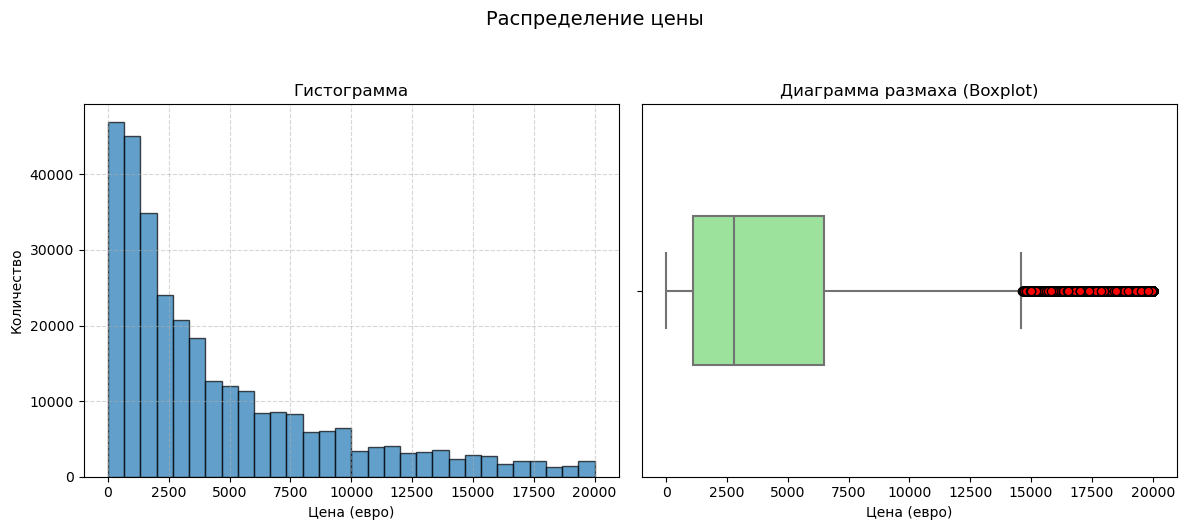

In [23]:
grafics(df['price'], 'Цена (евро)', 'Количество', 
       'Распределение цены')

In [24]:
conn = sqlite3.connect('database.db')

In [25]:
df.to_sql('df', conn, index=False, if_exists='replace')

309178

In [26]:
sql = '''
SELECT 
    brand AS Brand,
    ROUND(COUNT(brand) * 100.0 / cnt, 2) || '%' AS "Percent brand"
FROM (
    SELECT 
        *,
        COUNT(*) OVER() AS cnt
    FROM df
    WHERE price > 15000
) AS subquery
GROUP BY brand, cnt
ORDER BY COUNT(brand) * 100.0 / cnt DESC;
'''
pd.read_sql(sql, conn)

,Brand,Percent brand
0,volkswagen,20.62%
1,bmw,18.27%
2,audi,16.53%
3,mercedes_benz,16.05%
4,ford,4.22%
5,opel,2.94%
6,mini,2.73%
7,skoda,1.87%
8,sonstige_autos,1.74%
9,nissan,1.45%


In [27]:
sql = '''
SELECT *
FROM df
WHERE brand = 'bmw'
    AND model LIKE '%7%'
ORDER BY price DESC;
'''
pd.read_sql(sql, conn)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fueltype,brand,repaired
0,20000,sedan,2008,auto,408,7er,100000,petrol,bmw,no
1,20000,sedan,2009,auto,245,7er,150000,gasoline,bmw,no
2,19999,sedan,2008,auto,231,7er,90000,other,bmw,no
3,19900,sedan,2009,auto,326,7er,100000,petrol,bmw,nan
4,19500,sedan,2009,auto,245,7er,150000,gasoline,bmw,no
...,...,...,...,...,...,...,...,...,...,...
889,0,sedan,1999,auto,326,7er,150000,petrol,bmw,yes
890,0,sedan,1997,auto,286,7er,150000,petrol,bmw,nan
891,0,sedan,1995,auto,326,7er,5000,other,bmw,no
892,0,other,2018,auto,286,7er,150000,other,bmw,nan


In [28]:
sql = '''
SELECT DISTINCT(model)
FROM df
WHERE brand = 'bmw'
ORDER BY price DESC;
'''

pd.read_sql(sql, conn)

,model
0,6er
1,x_reihe
2,other
3,z_reihe
4,1er
5,i3
6,5er
7,7er
8,3er
9,m_reihe


In [29]:
df.sort_values(by='price').tail(10)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fueltype,brand,repaired
155371,20000,wagon,2010,auto,163,xc_reihe,60000,gasoline,volvo,no
13360,20000,coupe,2004,manual,325,crossfire,125000,petrol,chrysler,no
55338,20000,wagon,2012,manual,170,other,60000,gasoline,fiat,no
17724,20000,sedan,2002,auto,345,other,70000,gasoline,sonstige_autos,no
211999,20000,small,2012,manual,143,a1,50000,gasoline,audi,no
300119,20000,convertible,2002,nan,0,other,70000,petrol,sonstige_autos,nan
27303,20000,suv,2010,manual,190,navara,80000,gasoline,nissan,no
16074,20000,sedan,2014,manual,122,a1,30000,petrol,audi,no
96378,20000,sedan,2014,manual,160,cc,40000,petrol,volkswagen,no
101861,20000,other,1960,auto,0,other,150000,other,ford,nan


В данных присутствуют выбросы, автомобиль явно не может стоить 0 евро. Отсечем минимальную цену 5% квантилем, который будет составлять 200 евро. Сверху цену ограничивать не будем, так как 20000 евро автомобиль может стоить, например, BMW 7-го поколения, который есть в наших данных.

In [30]:
df['price'].quantile([0.05])

0.05    200.0
Name: price, dtype: float64

In [31]:
df = df.query('price >= 200')
df['price'].describe()

count    294099.000000
mean       4715.910955
std        4565.353497
min         200.000000
25%        1290.000000
50%        2999.000000
75%        6800.000000
max       20000.000000
Name: price, dtype: float64

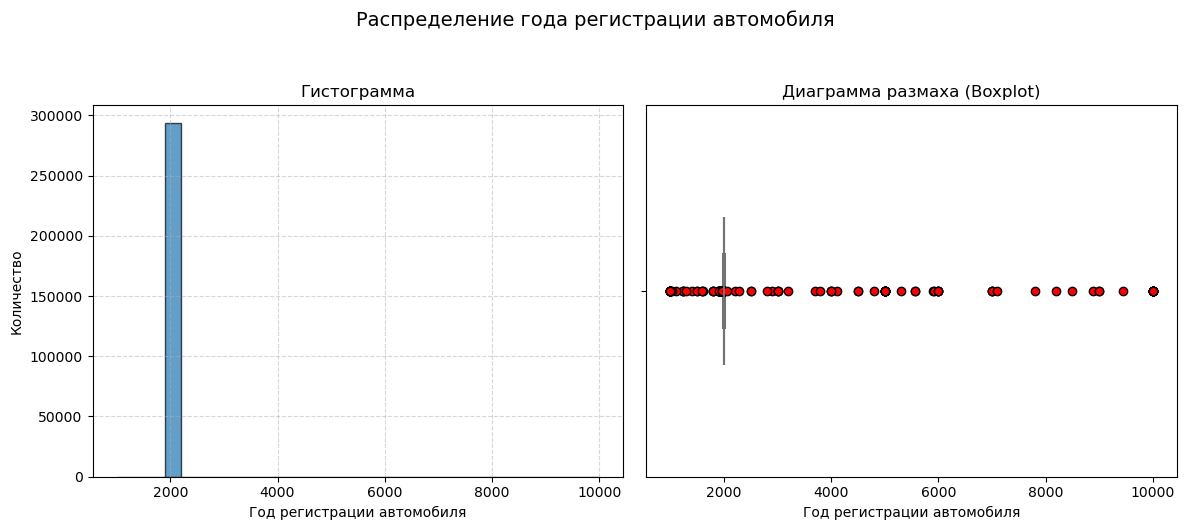

In [32]:
grafics(df['registration_year'], 'Год регистрации автомобиля', 'Количество', 
       'Распределение года регистрации автомобиля')

In [33]:
max(del_df['DateCrawled'])

Timestamp('2016-04-07 14:36:58')

Год последнего скачивания анкеты из базы - 2016. Ограничим год регистрации сверху 2016 годом. Низ огланичим 1% квантилем, который является 1980 годом.

In [34]:
df['registration_year'].quantile([0.01])

0.01    1980.0
Name: registration_year, dtype: float64

In [35]:
df = df.query('1980 <= registration_year <= 2016')

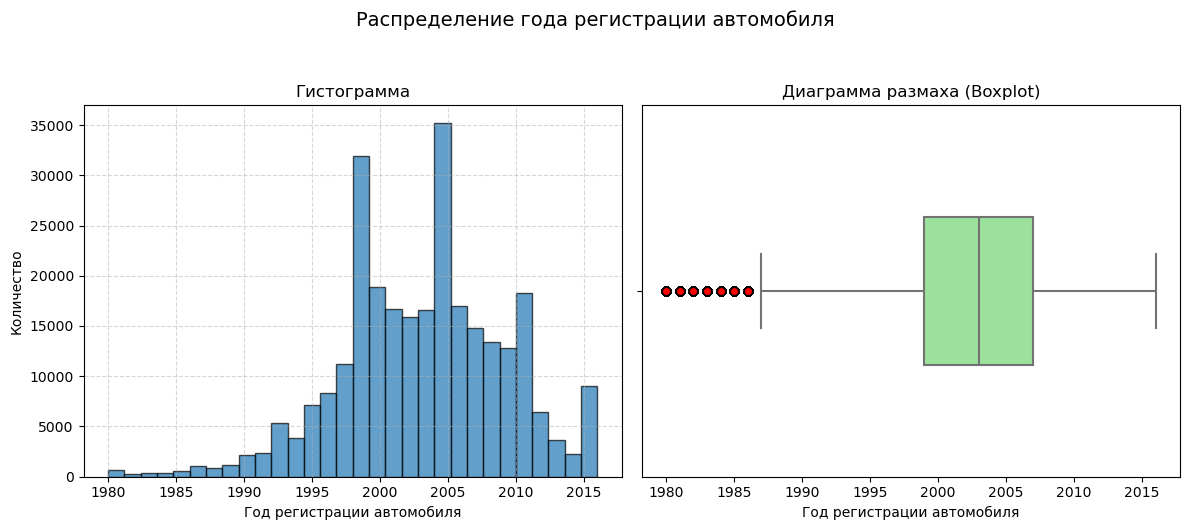

In [36]:
grafics(df['registration_year'], 'Год регистрации автомобиля', 'Количество', 
       'Распределение года регистрации автомобиля')

Оставим данные об автомобилях с 1980 по 2025 года

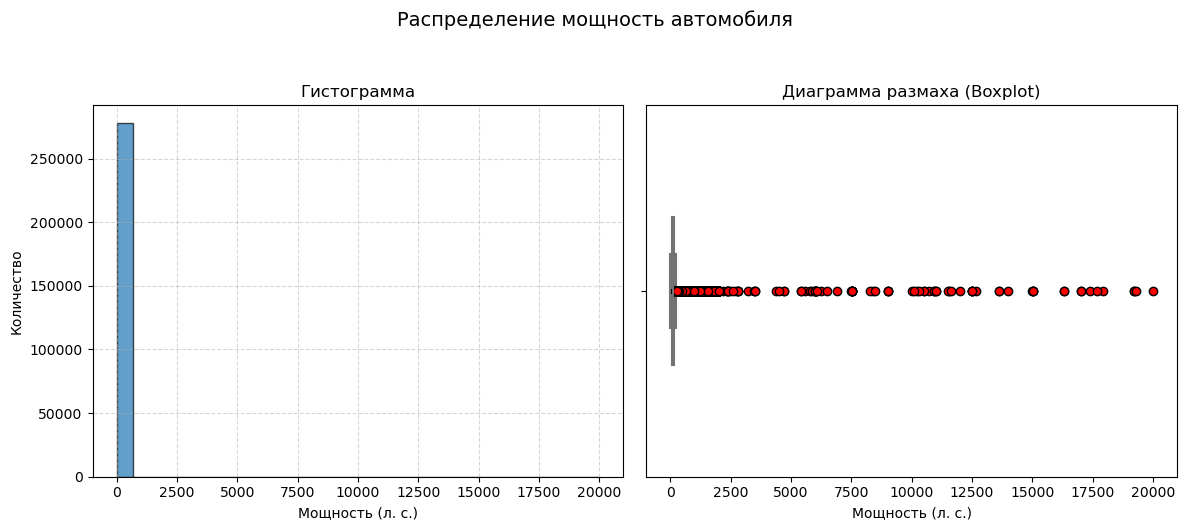

In [37]:
grafics(df['power'], 'Мощность (л. с.)', 'Количество', 
       'Распределение мощность автомобиля')

По данным из интернета, начиная с 1980 года, самая маломощная машина обладала мощностью 17 л.с, отбросим автомобили, у которых мощность меньше 17 л.с.

In [38]:
df = df.query('17 <= power <= 2000')

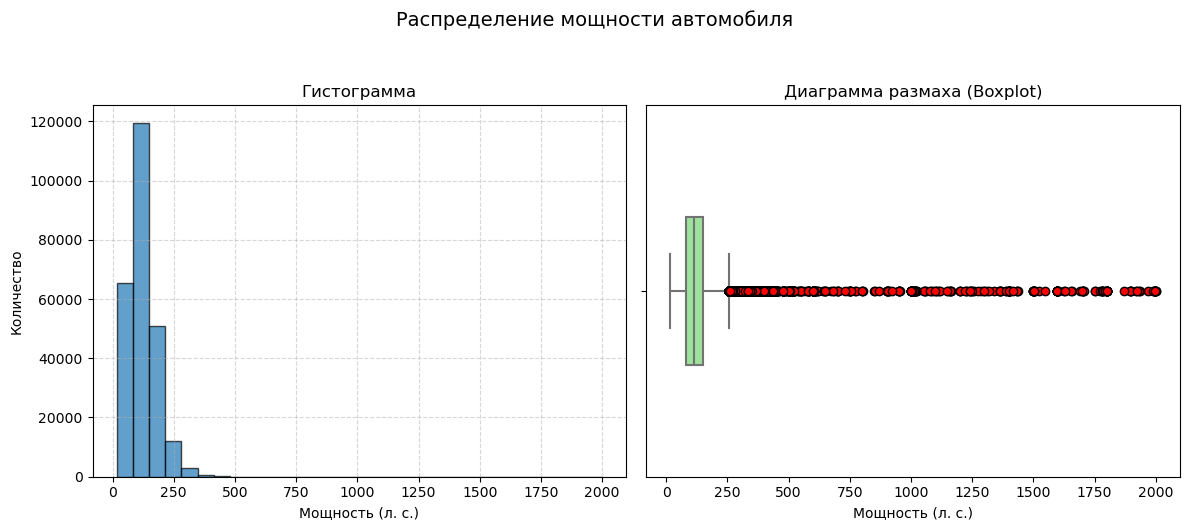

In [39]:
grafics(df['power'], 'Мощность (л. с.)', 'Количество', 
       'Распределение мощности автомобиля')

In [40]:
df[df['power'] > 1000].sort_values('power')

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fueltype,brand,repaired
351947,1500,bus,2001,manual,1001,zafira,5000,gasoline,opel,no
49724,1500,wagon,2003,manual,1001,focus,150000,gasoline,ford,nan
307044,1500,sedan,1999,manual,1001,astra,125000,petrol,opel,no
179821,1100,sedan,1995,manual,1001,a4,150000,other,audi,no
79305,1650,small,2000,auto,1001,a_klasse,150000,petrol,mercedes_benz,no
...,...,...,...,...,...,...,...,...,...,...
313582,1250,wagon,2003,auto,1998,passat,5000,gasoline,volkswagen,no
183472,2190,sedan,2003,manual,1998,laguna,150000,petrol,renault,no
28942,300,wagon,1996,manual,1999,golf,10000,petrol,volkswagen,nan
301617,10500,sedan,2006,manual,2000,golf,150000,petrol,volkswagen,no


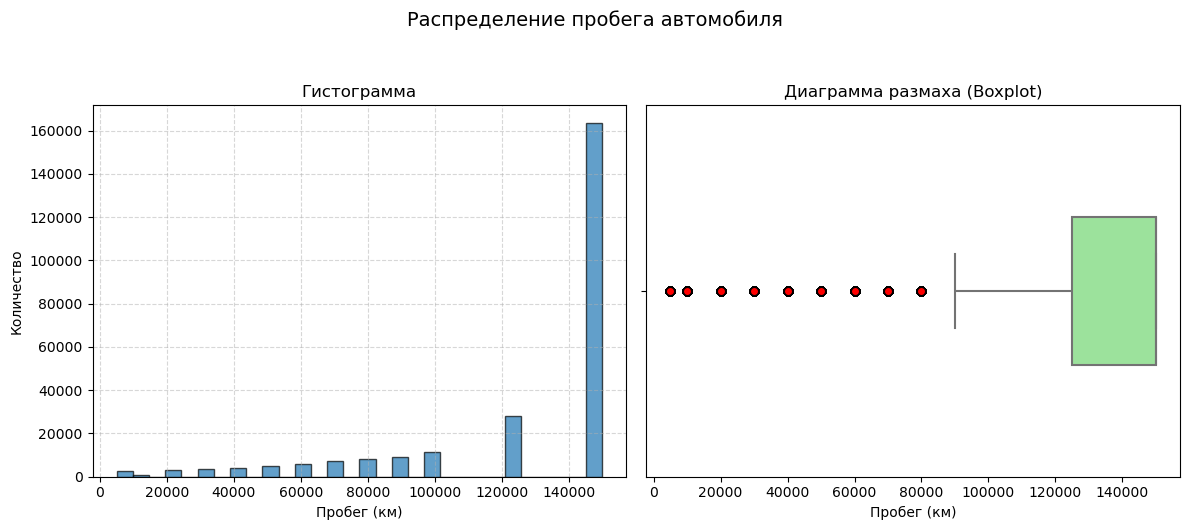

In [41]:
grafics(df['kilometer'], 'Пробег (км)', 'Количество', 
       'Распределение пробега автомобиля')

Здесь значения выглядят вполне реальными, ничего отсекать не будем

In [42]:
cat_col_names = df.select_dtypes(exclude='number').columns.tolist()
cat_col_names

['vehicle_type', 'gearbox', 'model', 'fueltype', 'brand', 'repaired']

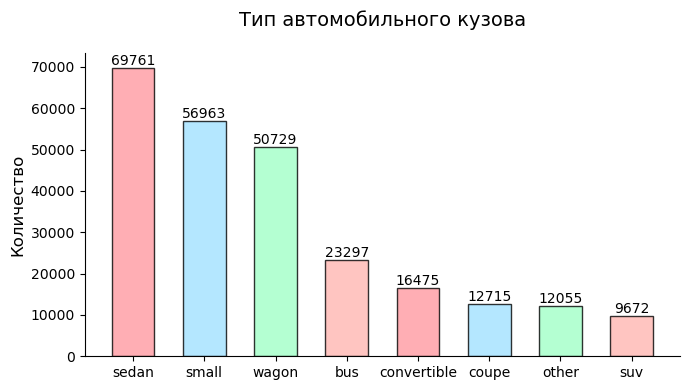

In [43]:
graf(df['vehicle_type'], 'Тип автомобильного кузова')

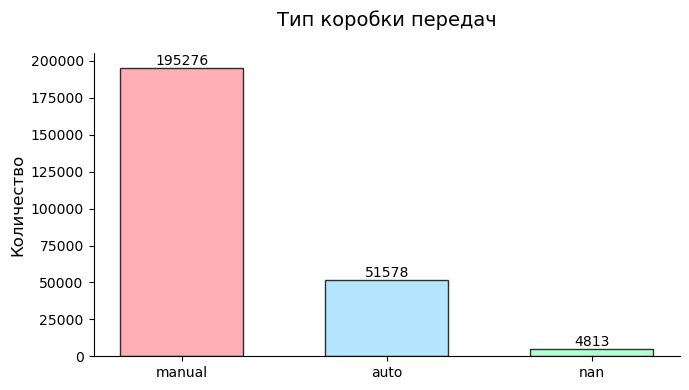

In [44]:
graf(df['gearbox'], 'Тип коробки передач')

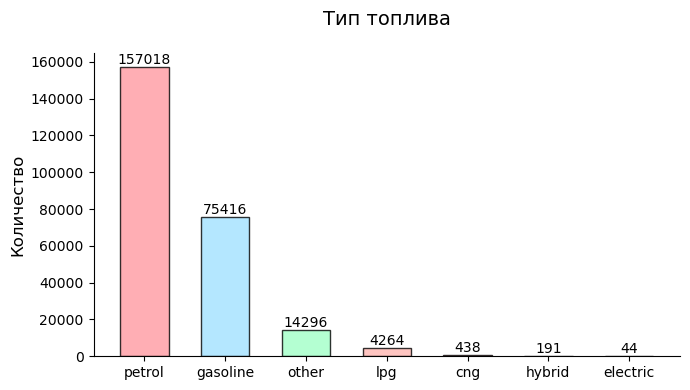

In [45]:
graf(df['fueltype'], 'Тип топлива')

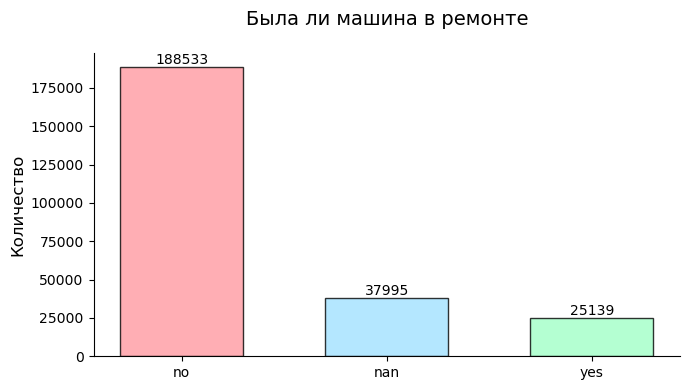

In [46]:
graf(df['repaired'], 'Была ли машина в ремонте')

Посмотрим на корреляцию между признаками с помощью Phik матрицы

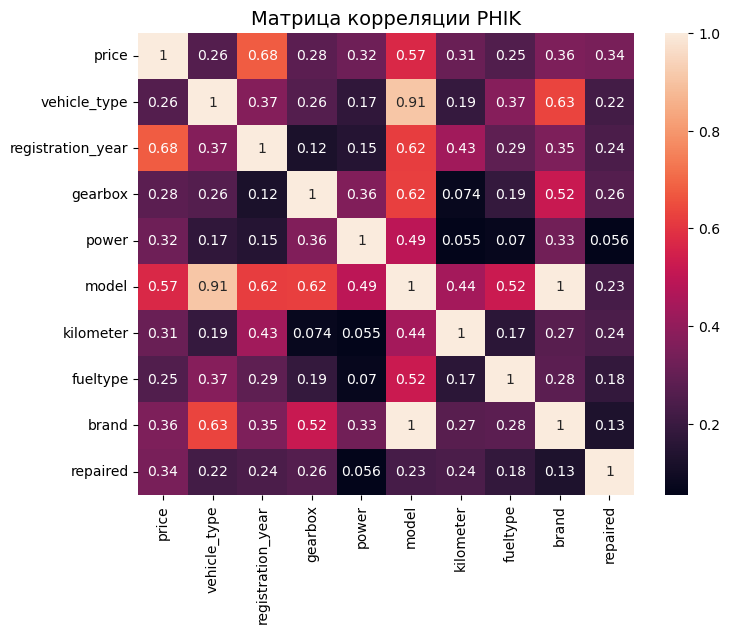

In [47]:
interval_cols = num_col_names
phik_overview = df.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(8,6))
sns.heatmap(phik_overview,  annot=True)
plt.title('Матрица корреляции PHIK', fontsize=14)
plt.show()

Можно сделать выводы:
* Цена машины больше зависит от года регистрации машины и от модели машины
* Наблюдается высокая связь между признаками **model** и **vehicle_type**, однако не будем считать это мультиколлинеарностью
* наблюдается мультиколлинеарность между признаками **model** и **brand**

Удалим признак **brand**, так как он полностью взаимосвязан с признаком **model**

In [48]:
df = df.drop(['brand'], axis=1)

**Вывод по исследовательскому анализу данных:**

* Были удалены неинформативные столбцы **'DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode', 'NumberOfPictures', 'RegistrationMonth'**
* Названия столбцов были приведены к стандарту sneak_case
* Пропуски были заполнены заглушками
* Дубликаты были обнаружены и устранены

Также, датафрейм был отфильтрован по условиям:
* Цена автомобиля от 200 до 14900 евро
* Год регистрации автомобиля с 1980 по 2025 года
* Мощность автомобиля от 17 до 2000 л.с.

Был проведен корреляционный анализ:

* Цена машины больше зависит от года регистрации машины и от модели машины
* Наблюдается высокая связь между признаками **model** и **vehicle_type**, однако не будем считать это мультиколлинеарностью
* наблюдается мультиколлинеарность между признаками **model** и **brand**

Был удален признак **brand**

### Подготовка выборок данных

<a href="#qwerty">К оглавнению</a>

На этом этапе:

1. Разобьем данные на входные признаки и целевой признак
2. Разобьем данные на тренировочную и тестовую выборки в соотношении 75%-25%

In [49]:
X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

print('Тренировочная выборка')
print(X_train.shape)
print(y_train.shape)
print('\nТестовая выборка')
print(X_test.shape)
print(y_test.shape)


Тренировочная выборка
(188750, 8)
(188750,)

Тестовая выборка
(62917, 8)
(62917,)


Выборки готовы. Следующий этап - обучение моделей.

### Обучение моделей

<a href="#qwerty">К оглавнению</a>

На этом этапе обучим 4 модели:
1. CatBoostRegressor
2. LightGBMRegressor
3. DummyRegressor
4. LinearRegression

 Алгоритм работы будет выглядеть так:
- оптимизация гиперпараметров и поиск лучшей модели с помощью кросс-валидации OptunaSearchCV;
- оценка метрики `RMSE`; 
- оценка времени работы лучшей модели на тренировочной выборке.

#### **CatBoostRegressor**

CatBoostRegressor - модель на основе градиентного бустинга. Подберем лучшие гиперпараметры модели на 3-х кратной кросс-валидации с помощью OptunaSearchCV. Признаки масштабировать и кодировать не будем, так как модель умеет это делать самостоятельно, однако укажем ей, какие признаки являются категориальными.

In [50]:
start = time()
optuna.logging.set_verbosity(optuna.logging.WARNING) 

categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Категориальные признаки: {categorical_features}")

model = CatBoostRegressor(
    verbose=0,
    random_state=42,
    allow_writing_files=False,
    cat_features=categorical_features
)


parameters = {
    'learning_rate': FloatDistribution(0.1, 0.5),
    'iterations': IntDistribution(100, 200),
    'depth': IntDistribution(6, 10),
    'l2_leaf_reg': IntDistribution(3, 7),
    'subsample': FloatDistribution(0.7, 1.0),  
    'colsample_bylevel': FloatDistribution(0.7, 1.0),  
    'random_strength': FloatDistribution(0, 2), 
    'min_data_in_leaf': IntDistribution(5, 30)  
}

oscv = OptunaSearchCV(
    model,
    parameters,
    random_state=42,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_trials=5,
    n_jobs=-1,
    verbose=0
    
)

oscv.fit(X_train, y_train)

RMSE_train_CatBoost = -oscv.best_score_

best_CatBoost_model = oscv.best_estimator_

print('RMSE на кросс-валидации:', RMSE_train_CatBoost)
print('\n')
end = time()
time_optuna_CatBoost = round((end-start)/60,2)

Категориальные признаки: ['vehicle_type', 'gearbox', 'model', 'fueltype', 'repaired']
RMSE на кросс-валидации: 1643.603561176624




Посчитаем время обучения лучшей модели CatBoost

In [51]:
start = time()

best_CatBoost_model.fit(X_train, y_train)

end = time()

time_fit_CatBoost = round((end-start)/60, 2)


Посчитаем время предсказания лучшей модели CatBoost 

In [52]:
start = time()

best_CatBoost_model.predict(X_train)

end = time()

time_predict_CatBoost = round((end-start)/60,2) 


In [53]:
print(f'Время подбора гиперпараметров: {time_optuna_CatBoost}мин')
print(f'Время обучения: {time_fit_CatBoost}мин')
print(f'Время предсказания: {time_predict_CatBoost}мин')

Время подбора гиперпараметров: 5.44мин
Время обучения: 0.8мин
Время предсказания: 0.04мин


#### **LightGBMRegressor**

LightGBMRegressor - модель на основе градиентного бустинга. Подберем лучшие гиперпараметры модели на 3-х кратной кросс-валидации с помощью OptunaSearchCV. Признаки масштабировать и кодировать не будем, так как модель умеет это делать самостоятельно. Но, укажем модели, какие признаки являются категориальные, предварительно преобразовав их в тип **category**.

Ниже выполним  оптимизацию гиперпараметров и определим лучшую модель, которую сохраним в переменную best_CatBoost_model

In [54]:
start = time()
optuna.logging.set_verbosity(optuna.logging.WARNING) 

categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(f"Категориальные признаки: {categorical_features}")

X_train_lightgbm = X_train.copy()
for col in categorical_features:
    X_train_lightgbm[col] = X_train_lightgbm[col].astype('category')

model = lgb.LGBMRegressor(
    random_state=42,
    verbose=-1,  
    force_col_wise=True
)


parameters = {
    'learning_rate': FloatDistribution(0.01, 0.3),
    'n_estimators': IntDistribution(100, 200),
    'max_depth': IntDistribution(3, 10),
    'num_leaves': IntDistribution(20, 100),
    'min_child_samples': IntDistribution(5, 30),
    'subsample': FloatDistribution(0.7, 1.0),
    'colsample_bytree': FloatDistribution(0.7, 1.0),
    'reg_alpha': FloatDistribution(0, 1),
    'reg_lambda': FloatDistribution(0, 1)
}

oscv_lgb = OptunaSearchCV(
    model,
    parameters,
    random_state=42,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_trials=5,
    n_jobs=-1,
    verbose=0
)


oscv_lgb.fit(X_train_lightgbm, y_train)

best_LightGBM_model = oscv_lgb.best_estimator_

RMSE_train_LightGBM = -oscv_lgb.best_score_
print('RMSE на кросс-валидации:', RMSE_train_LightGBM)
end = time()

time_optuna_LightGBM = round((end-start)/60, 2)

Категориальные признаки: ['vehicle_type', 'gearbox', 'model', 'fueltype', 'repaired']
RMSE на кросс-валидации: 1585.9953441187427


Посчитаем время обучения лучшей модели LightGBM 

In [55]:
start = time()

best_LightGBM_model.fit(X_train_lightgbm, y_train)

end = time()

time_fit_LightGBM = round((end-start)/60, 2)

Посчитаем время предсказания лучшей модели LightGBM

In [56]:
start = time()

best_LightGBM_model.predict(X_train_lightgbm)

end = time()

time_predict_LightGBM = round((end-start)/60,2) 


In [57]:
print(f'Время подбора гиперпараметров: {time_optuna_LightGBM}мин')
print(f'Время обучения: {time_fit_LightGBM}мин')
print(f'Время предсказания: {time_predict_LightGBM}мин')

Время подбора гиперпараметров: 0.72мин
Время обучения: 0.08мин
Время предсказания: 0.05мин


#### **LinearRegression**

LinearRegression - модель линейной регрессии. Перед обучением масшабируем количественные признаки с помощью StandardScaler и кодируем с помощью OneHotEncoder категориальные признаки.

In [58]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

num_col_names = X_train_copy.select_dtypes(include='number').columns.tolist()
cat_col_names = X_train_copy.select_dtypes(exclude='number').columns.tolist()

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train_copy[cat_col_names])
X_test_ohe = encoder.transform(X_test_copy[cat_col_names])  

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_copy[num_col_names])
X_test_scaled = scaler.transform(X_test_copy[num_col_names])  

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_scale_ohe = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_scale_ohe = pd.concat([X_test_ohe, X_test_scaled], axis=1)


In [59]:
model_lr = LinearRegression()

parameters_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

grid_search_lr = GridSearchCV(
    model_lr,
    parameters_lr,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X_train_scale_ohe, y_train)

best_LR_model = grid_search_lr.best_estimator_

RMSE_train_LR = -grid_search_lr.best_score_
print('RMSE на кросс-валидации для LinearRegression:', RMSE_train_LR)
print('Лучшие параметры:', grid_search_lr.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
RMSE на кросс-валидации для LinearRegression: 2614.4372612340007
Лучшие параметры: {'copy_X': True, 'fit_intercept': True}


In [60]:
start = time()

best_LR_model.fit(X_train_scale_ohe, y_train)

end = time()

time_fit_LR = round((end-start)/60, 2)

In [61]:
start = time()

best_LR_model.predict(X_train_scale_ohe)

end = time()

time_predict_LR = round((end-start)/60,3) 

In [62]:
print(f'Время обучения LR: {time_fit_LR}мин')
print(f'Время предсказания LR: {time_predict_LR}мин')

Время обучения LR: 0.96мин
Время предсказания LR: 0.018мин


#### **DummyRegressor**

DummyRegressor - константная модель. Обучим ее, чтобы убедиться, что остальные модели действительно находят закономерности в данных. Модель будем обучать на таких же данных, на каких обучали модель линейной регрессии (масштабируемые StandardScaler и кодируемые OneHotEncoder)

In [63]:
start = time()

model_DummyRegressor = DummyRegressor(strategy="mean")
model_DummyRegressor.fit(X_train_scale_ohe, y_train)

end = time()

time_fit_Dummy = round((end-start)/60, 2)

In [64]:
start = time()

y_train_pred = model_DummyRegressor.predict(X_train_scale_ohe)

end = time()

time_predict_Dummy = round((end-start)/60, 2)

In [65]:
RMSE_train_Dummy = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE на тренировочной выборке: {RMSE_train_Dummy:.4f}")

RMSE на тренировочной выборке: 4645.5819


In [66]:
print(f'Время обучения Dummy: {time_fit_Dummy}мин')
print(f'Время предсказания Dummy: {time_predict_Dummy}мин')

Время обучения Dummy: 0.0мин
Время предсказания Dummy: 0.0мин


### Анализ времени обучения моделей, времени предсказания моделей и качества моделей

<a href="#qwerty">К оглавнению</a>

In [67]:
columns = ['Model', 'Time fit train', 'Time predict train']
rows = [['CatBoost', f"{time_fit_CatBoost}min", f"{time_predict_CatBoost}min"],
        ['LigthGBM', f"{time_fit_LightGBM}min", f"{time_predict_LightGBM}min"],
        ['LinearRegression', f"{time_fit_LR}min", f"{time_predict_LR}min"],
        ['DummyRegressor', f"{time_fit_Dummy}min", f"{time_predict_Dummy}min"]]

time_df = pd.DataFrame(columns=columns, data=rows)

In [68]:
columns = ['Model', 'Train RMSE']
rows = [['CatBoost', round(RMSE_train_CatBoost)],
        ['LigthGBM', round(RMSE_train_LightGBM)],
        ['LinearRegression', round(RMSE_train_LR)],
        ['DummyRegressor', round(RMSE_train_Dummy)]]
RMSE_df = pd.DataFrame(columns=columns, data=rows)

#### Анализ времени

In [69]:
time_df

,Model,Time fit train,Time predict train
0,CatBoost,0.8min,0.04min
1,LigthGBM,0.08min,0.05min
2,LinearRegression,0.96min,0.018min
3,DummyRegressor,0.0min,0.0min


#### Анализ качества

In [70]:
RMSE_df

,Model,Train RMSE
0,CatBoost,1644
1,LigthGBM,1586
2,LinearRegression,2614
3,DummyRegressor,4646


### Лучшая модель

<a href="#qwerty">К оглавнению</a>

Критерии, которые важны заказчику:
* качество предсказания;
* время обучения модели;
* время предсказания модели.

Наиболее подходящей под эти критерии является модель **CatBoostRegressor**.

Она оказалась самой быстрой в обучении (не берем Dummy модель) и самой качественной на валидационных данных. Также она достаточно быстро предказывает новые данные, так что лучшей моделью будем считать **CatBoostRegressor**.

Теперь проверим качество лучшей модели на тестовой выборке

In [71]:
y_pred = best_CatBoost_model.predict(X_test)

RMSE_test_CatBoost = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE на тестовой выборке: {RMSE_test_CatBoost:.4f}')

RMSE на тестовой выборке: 1631.5319


Модель быстро предсказала данные. RMSE удовлетворяет условию (RMSE < 2500).

### Вывод

<a href="#qwerty">К оглавнению</a>

**Цель проекта** была достигнута: разработана модель машинного обучения для предсказания стоимости автомобилей, которая соответствует всем критериям заказчика — качество предсказания, скорость обучения и скорость выполнения предсказаний.

**1. Анализ и предобработка данных**

* Данные были очищены и подготовлены. Были удалены неинформативные признаки.
* Была проведена филтрация данных по цене автомобиля, году регистрации и мощности, что позволило убрать аномалии в данных.
* Был проведен корреляционный анализ, который позволил устранить мультиколлинеарность (удалили признак **brand**)

**2. Выбор и оценка моделей**

Было 4 кандидата:

* **DummyRegressor**: эту модель использовали, чтобы убедиться, что остальные модели находят закономерности в данных. То есть метрика качества других моделей не должна быть хуже метрики, которую выдает DummyRegressor.
* **LinearRegression**: Выступила в качестве простой и интерпретируемой линейной модели. Ее результаты более сложным алгоритмам, что подтвердило наличие нелинейных зависимостей в данных.
* **CatBoostRegressor** и **LightGBMRegressor**: Сложные алгоритмы градиентного бустинга, показавшие наивысшее качество предсказания. Их гиперпараметры были настроены с помощью OptunaSearchCV, что позволило максимально раскрыть их потенциал на предоставленных данных.

**3. Результаты и выбор финальной модели**

Наиболее подходящей оказалась модель **CatBoostRegressor**

Она оказалась самой быстрой в обучении (не берем Dummy модель), быстрой в предсказании новых данных и самой качественной на валидационных данных. 

Лучшая модель, которая будет рекомендована заказчику:

In [72]:
display(best_CatBoost_model)
oscv.best_params_

{'learning_rate': 0.43208448474357,
 'iterations': 199,
 'depth': 9,
 'l2_leaf_reg': 7,
 'subsample': 0.7803432289931278,
 'colsample_bylevel': 0.9063298025196352,
 'random_strength': 0.047589702937722356,
 'min_data_in_leaf': 26}